<h1 style = 'text-align: center;'>United States Wildlife</h1>



# I. Introduction

The ecosystem in our planet is getting worse day by day. Not only the environmental change but also the extinction of many species result in detrimental effects to the ecosystem. Many people are not aware of the importance of wildlife since they think animals and plants have no influence on their lives. However, in fact, wildlife plays a key role in improving the quality of human life. For example, a variety of wildlife species can promote the biodiversity which benefits human health and maintains ecosystem's functionality. Furthermore, many medicines that address popular  health issues such disorders and heart diseases are the productions of chemicals from plants and animals. 

Since many species are at risk of extinction, it is extremely important to have appropriate conservation plans to protect our planet's ecosystem.

This project presents data mining on United States Wildlife to understand which regions need to be prioritized in conservation. In addition, the most endangered species family will be dicussed.

# II. Data Analysis

## 1. Import Data 

In [1]:
# import some libraries
from pandas import DataFrame
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import plotly.graph_objects as go
import urllib.parse
from urllib.parse import urljoin
import re
from wordcloud import WordCloud
from PIL import Image
import squarify
import warnings
warnings.filterwarnings("ignore")



In [2]:
pd.set_option('precision', 0) 
df = pd.read_csv('CleanWildlife.csv', '\t', index_col=0) # read csv file

In [3]:
df.head(10) # checking the first 10 rows in our dataset to ensure everything is fine

Scientific Name                   Common Name  Region  \
0                Abies fraseri                    Fraser fir  NC, VA   
1          Ablautus schlingeri          Oso Flaco robber fly      CA   
2               Abronia alpina  Ramshaw Meadows sand-verbena      CA   
3            Abronia ammophila      Yellowstone Sand Verbena     NaN   
4       Abronia ammophila var.                           NaN     NaN   
5             Abronia ammphila                  sand-verbena      WY   
6            Abronia bigelovii                  sand-verbena      NM   
7           Abronia macrocarpa    Large-fruited sand-verbena      TX   
8            Abronia turbinata                  sand-verbena      NV   
9  Abronia umbellata acutalata      Rose-purple sand-verbena      WA   

          Family  First Listed      Taxonomic Group      Status Type  
0       pinaceae           NaN  Conifers and Cycads  Not Listed    P  
1       asilidae           NaN              Insects  Not Listed    I  
2  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
3  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
4  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
5  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
6  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
7  nyctaginaceae          1988     Flowering Plants  Endangered    P  
8  nyctaginaceae           NaN     Flowering Plants  Not Listed    P  
9  nyctaginaceae           NaN     Flowering Plants  Not Listed    P

All columns are fine. The species without listing status and listing date are common in the USA. They may not face the risk of being extinct at the moment.

## 2. Taxonomic Group Distribution

In this section, we will see the number of each species group in the United States

In [4]:
group = df.groupby("Taxonomic Group").size() # count the number of species by taxonomic group
group.sort_values(ascending = True, inplace = True) # ordering
count_group = pd.DataFrame({"Group":group.index, "Count":group.values}) # grouping the counts and group names in a df


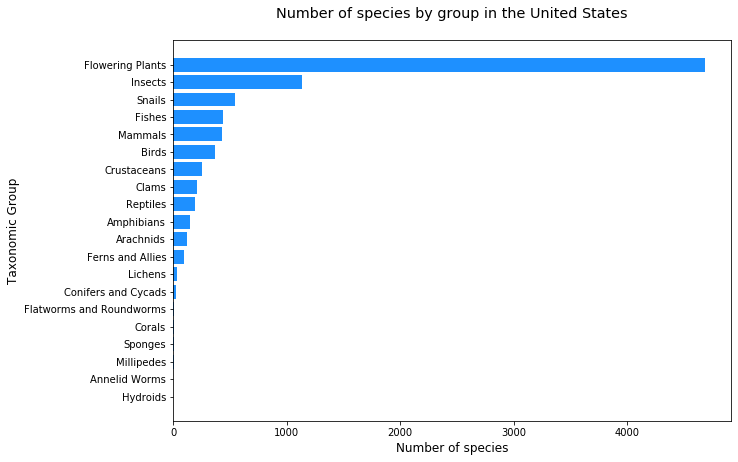

In [5]:
plt.figure(figsize=(10,7)) # set figure size

# using bar plot to see the number of species in each taxonomic group
plt.barh(y=count_group.Group, width=count_group.Count, color ="dodgerblue")
plt.title('Number of species by group in the United States\n', fontsize ='x-large')
plt.ylabel('Taxonomic Group', fontsize ='large')
plt.xlabel('Number of species', fontsize='large')
plt.show()

As seen from the graph, the most popular taxonomic groups in United States are very familiar: plants, insects, snails, fishes, mammals and birds.

The group with least species are Hydroids and Annelid Worms. Hydroids are very small animals and most of them live in salt water such as marine environment. Annelid Worms adapt to various ecologies but their most living states are aslo marine environment. Another similarity between Hydroids and Annelid Worms is that both species are invertebrates. 

Other groups with small number of species such as corals, sponges, conifers and cycads also prefere marine environments or seaside surfaces.

## 3. Overview of species distribution

In [6]:
def count(data): 
    
    """
      Function to count the number of species in each state in the United States
          data: dataframe that will be used to count 
      The function return a dataframe with two columns: state codes and number of species
  
    """
    
    split_char = ","
    state = [] # empty list to store states

    for i in range (0,len(data)):
        words = data.ix[i,"Region"] # get state codes
        try:
            temp = words.split(split_char) # try to split the string by "," each element in temp is a state code
            for item in temp:
                item = item.replace(" ","") # remove whitespace
                state.append(item) #save the state codes into the empty list we created above
        except:  # if we cannot split, the region is NaN so we pass it
            pass 
    
    codelist = pd.Series(state).drop_duplicates().tolist() #get a list of state codes in our dataframe

    count = []
    for item in codelist:
        count.append(state.count(item)) # count the number of species in each state

    # combine state code and counts of species into a dataframe
    state_count = pd.concat((pd.DataFrame(codelist).T, pd.DataFrame(count).T)).T 
    state_count.columns = ("Code","No. of Species") # colnames

    return state_count
    

### Let's see the species distribution by different regions in the United States.

In [7]:
count_species = count(df) # count the number of species by states


# use plotly to make Choropleth Map 
# I learned from plotly: https://plot.ly/python/choropleth-maps/

fig = go.Figure(data=go.Choropleth(
        locations=count_species["Code"], 
        z = count_species["No. of Species"].astype(float), 
        locationmode = 'USA-states', 
        colorscale = "blues",
        colorbar_title = "Number of Species",
        marker_line_color = "white"
))

fig.update_layout(
    title_text = "Species Distribution by U.S States",
    geo_scope='usa')
    


The region that have most diverse ecosystem is Carlifornia, and Hawaii is ranked second.

### We can see the distribution of endangered species

In [8]:
df_end = df[df.Status == "Endangered"] # subset a dataframe with endangered species
df_end.index = range(len(df_end.index)) # reset the index
df_end.head(10) # have a look at the data frame

Scientific Name                      Common Name  \
0                    Abronia macrocarpa       Large-fruited sand-verbena   
1               Abutilon eremitopetalum                              NaN   
2                    Abutilon menziesii                      Ko`oloa`ula   
3                  Abutilon sandwicense                              NaN   
4                         Acaena exigua                          Liliwai   
5   Acanthomintha obovata ssp. duttonii              San Mateo thornmint   
6            Accipiter striatus venator  Puerto Rican sharp-shinned hawk   
7                      Achatinella spp.                 Oahu tree snails   
8                    Achyranthes mutica                              NaN   
9  Achyranthes splendens var. rotundata        Round-leaved chaff-flower   

  Region          Family  First Listed   Taxonomic Group      Status Type  
0     TX   nyctaginaceae          1988  Flowering Plants  Endangered    P  
1     HI       malvaceae          1991  Flowering Plants  Endangered    P  
2     HI       malvaceae          1986  Flowering Plants  Endangered    P  
3     HI       malvaceae          1991  Flowering Plants  Endangered    P  
4     HI        rosaceae          1992  Flowering Plants  Endangered    P  
5     CA       lamiaceae          1985  Flowering Plants  Endangered    P  
6     PR    accipitridae          1994             Birds  Endangered    V  
7     HI  achatinellidae          1981            Snails  Endangered    I  
8     HI   amaranthaceae          1996  Flowering Plants  Endangered    P  
9     HI   amaranthaceae          1986  Flowering Plants  Endangered    P

In [9]:
count_species_end = count(df_end) # count the number of endangered species by states


# use plotly to make Choropleth Map 
fig = go.Figure(data=go.Choropleth(
        locations=count_species_end["Code"], 
        z = count_species_end["No. of Species"].astype(float), 
        locationmode = 'USA-states', 
        colorscale = "portland",
        colorbar_title = "Number of Species",
        marker_line_color = "white"
))

fig.update_layout(
    title_text = "Endangered Species Distribution by U.S States",
    geo_scope='usa')
    

It is interesting that the place with most endangered species is Hawaii and California is at the second place.
The taxonomic groups with least numbers of species may struggle to survive and grow, thus, they would be very rare and be potentially listed as endangered. In the previous section about taxonomic group, we see that these groups prefer marine environments. Therefore, Hawaii which is surrounded by seas would be the best home for them and has more endangered species than California.


From this section, we can conclude that Califorina and Hawaii should receive wildlife conservation priority.

## 4. Species Family

In this section, we will see which families have highes numbers of endangered species.

### At first, let's have a glance at the frequencies of all species

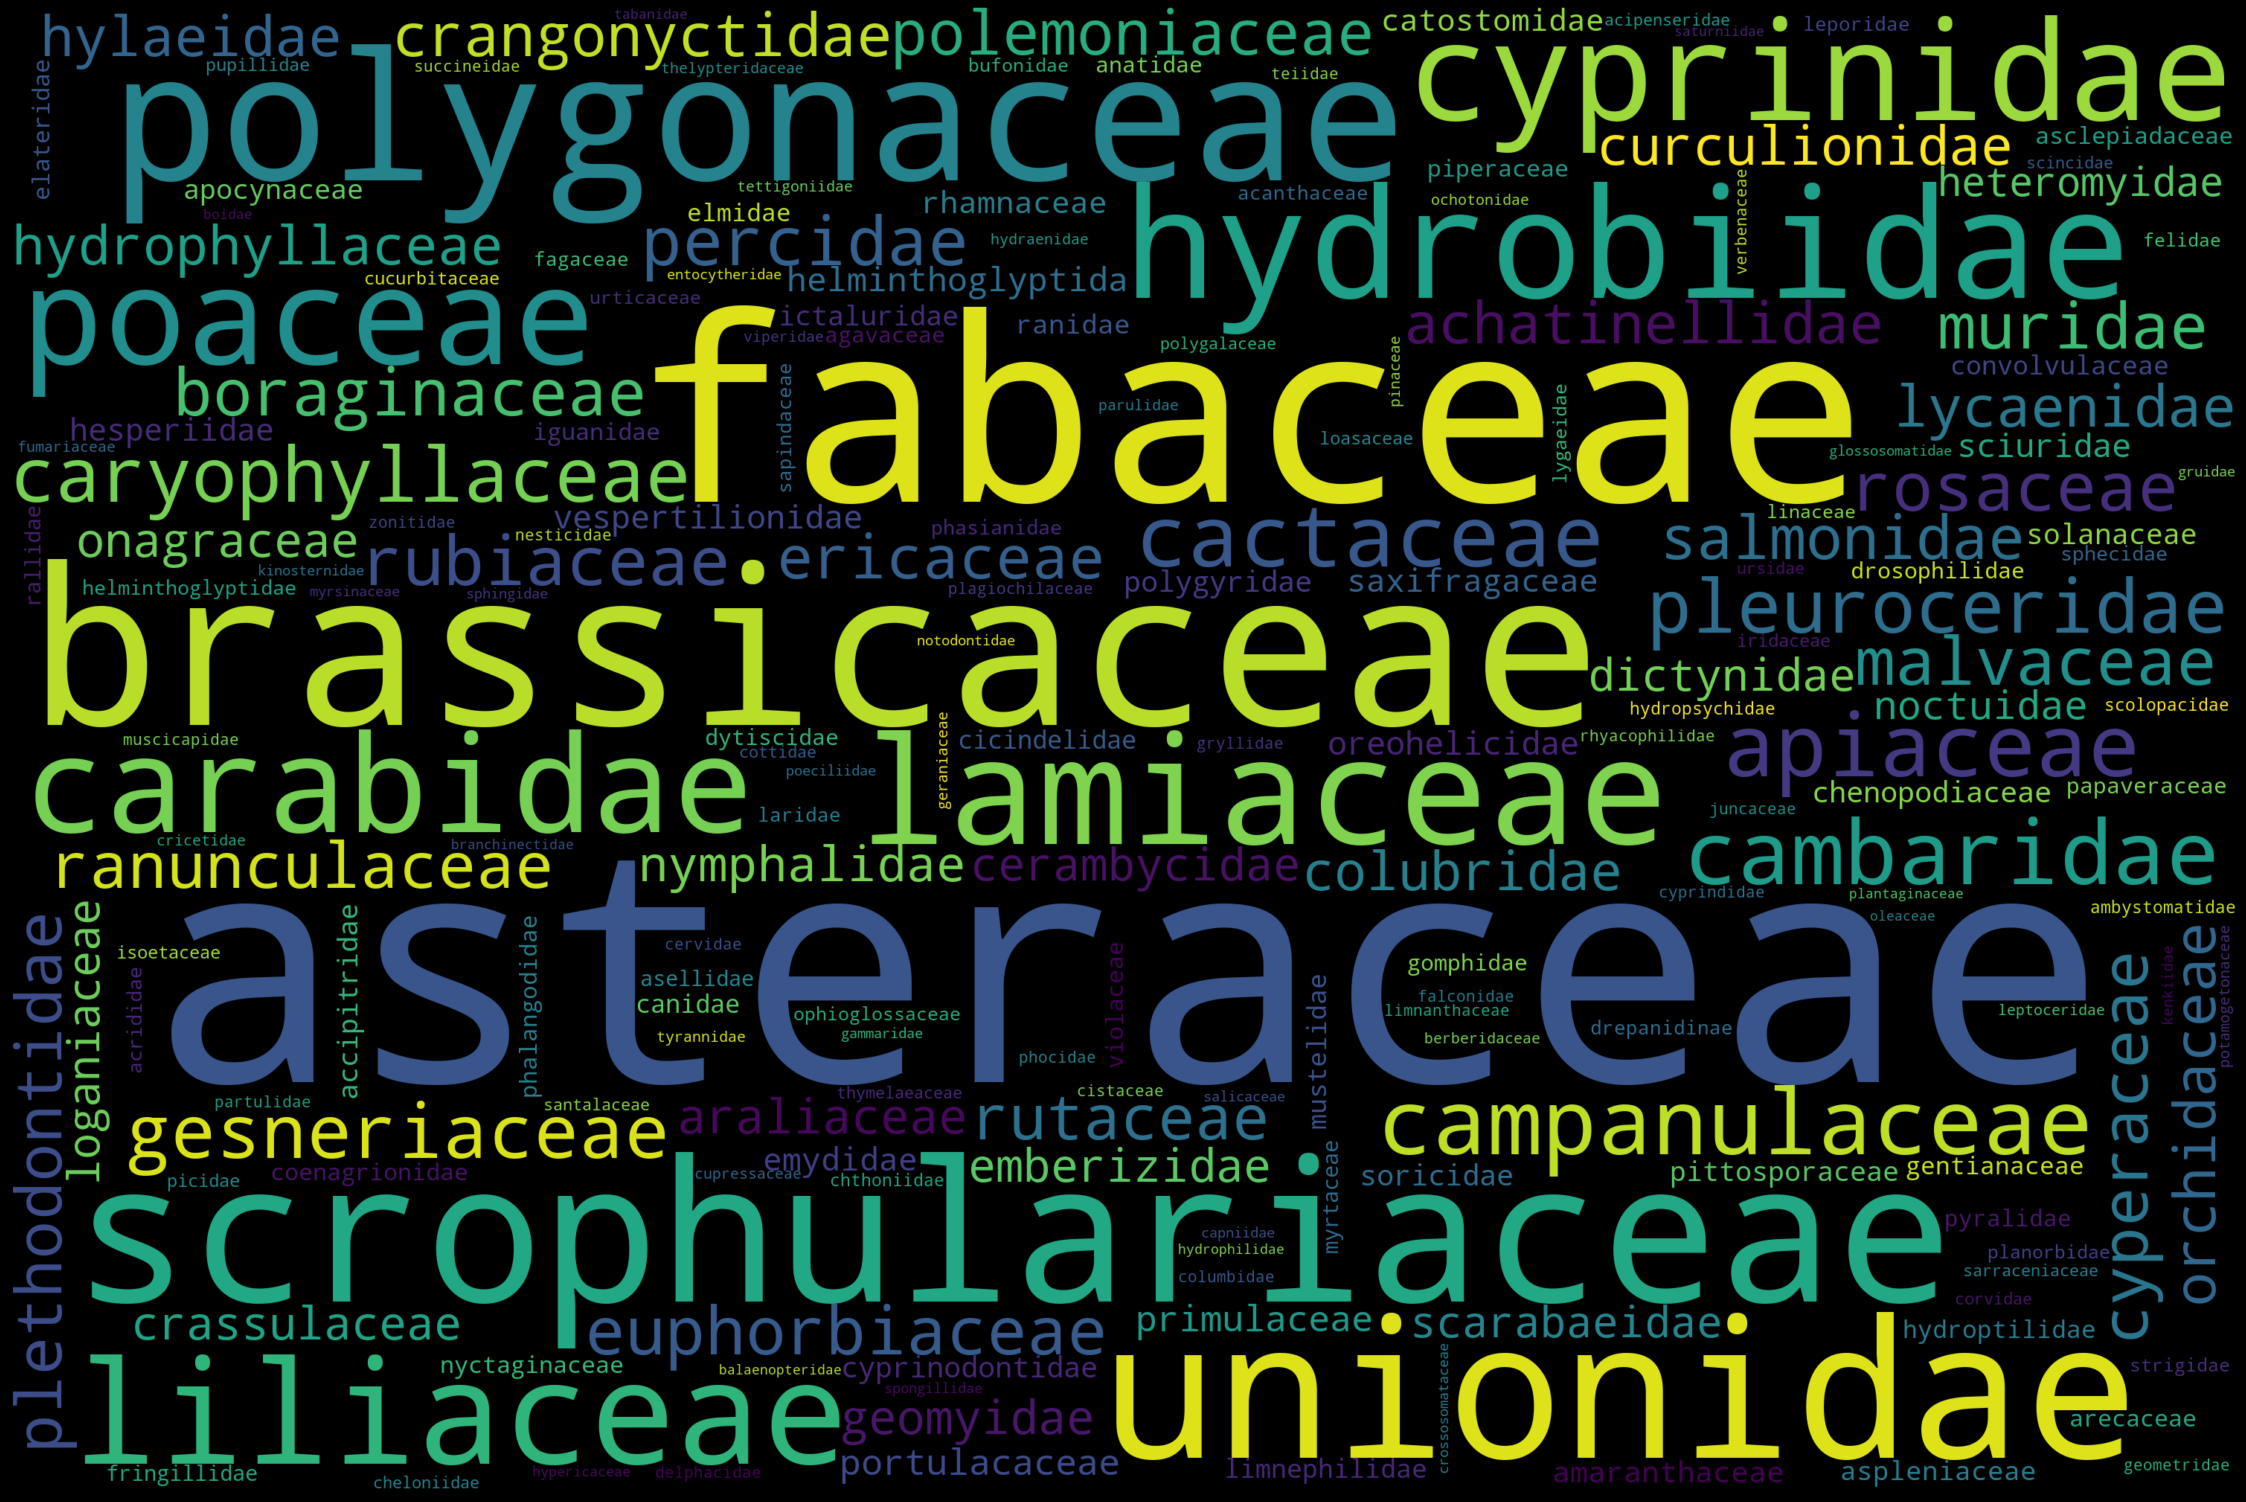

In [10]:
#retrieve all the words in column Family and save into string
string = " ".join(fname for fname in df.Family)

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, width=3000, height=2000) # collocations = False to avoid double words
wordcloud.generate(string)

# Display the generated image
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

The family with most species is Asteraceae which is a sunflower family. Some families with high number of species such as Fabaceae, Brassicaceae, Scrophulariaceae and Polygonaceae are also flowing plants.

In terms of animals, invertebrate families have the most variety in species. As we can see from the wordcloud picture, some examples of animal families are Hydrobiidae (snails), Unionidae (mussels) and Carabidae (ground beetles). In vertebrates, Cyprinidae (a family of freshwater fishes) is the family with the highest number of species.


### The frequencies of endangered species

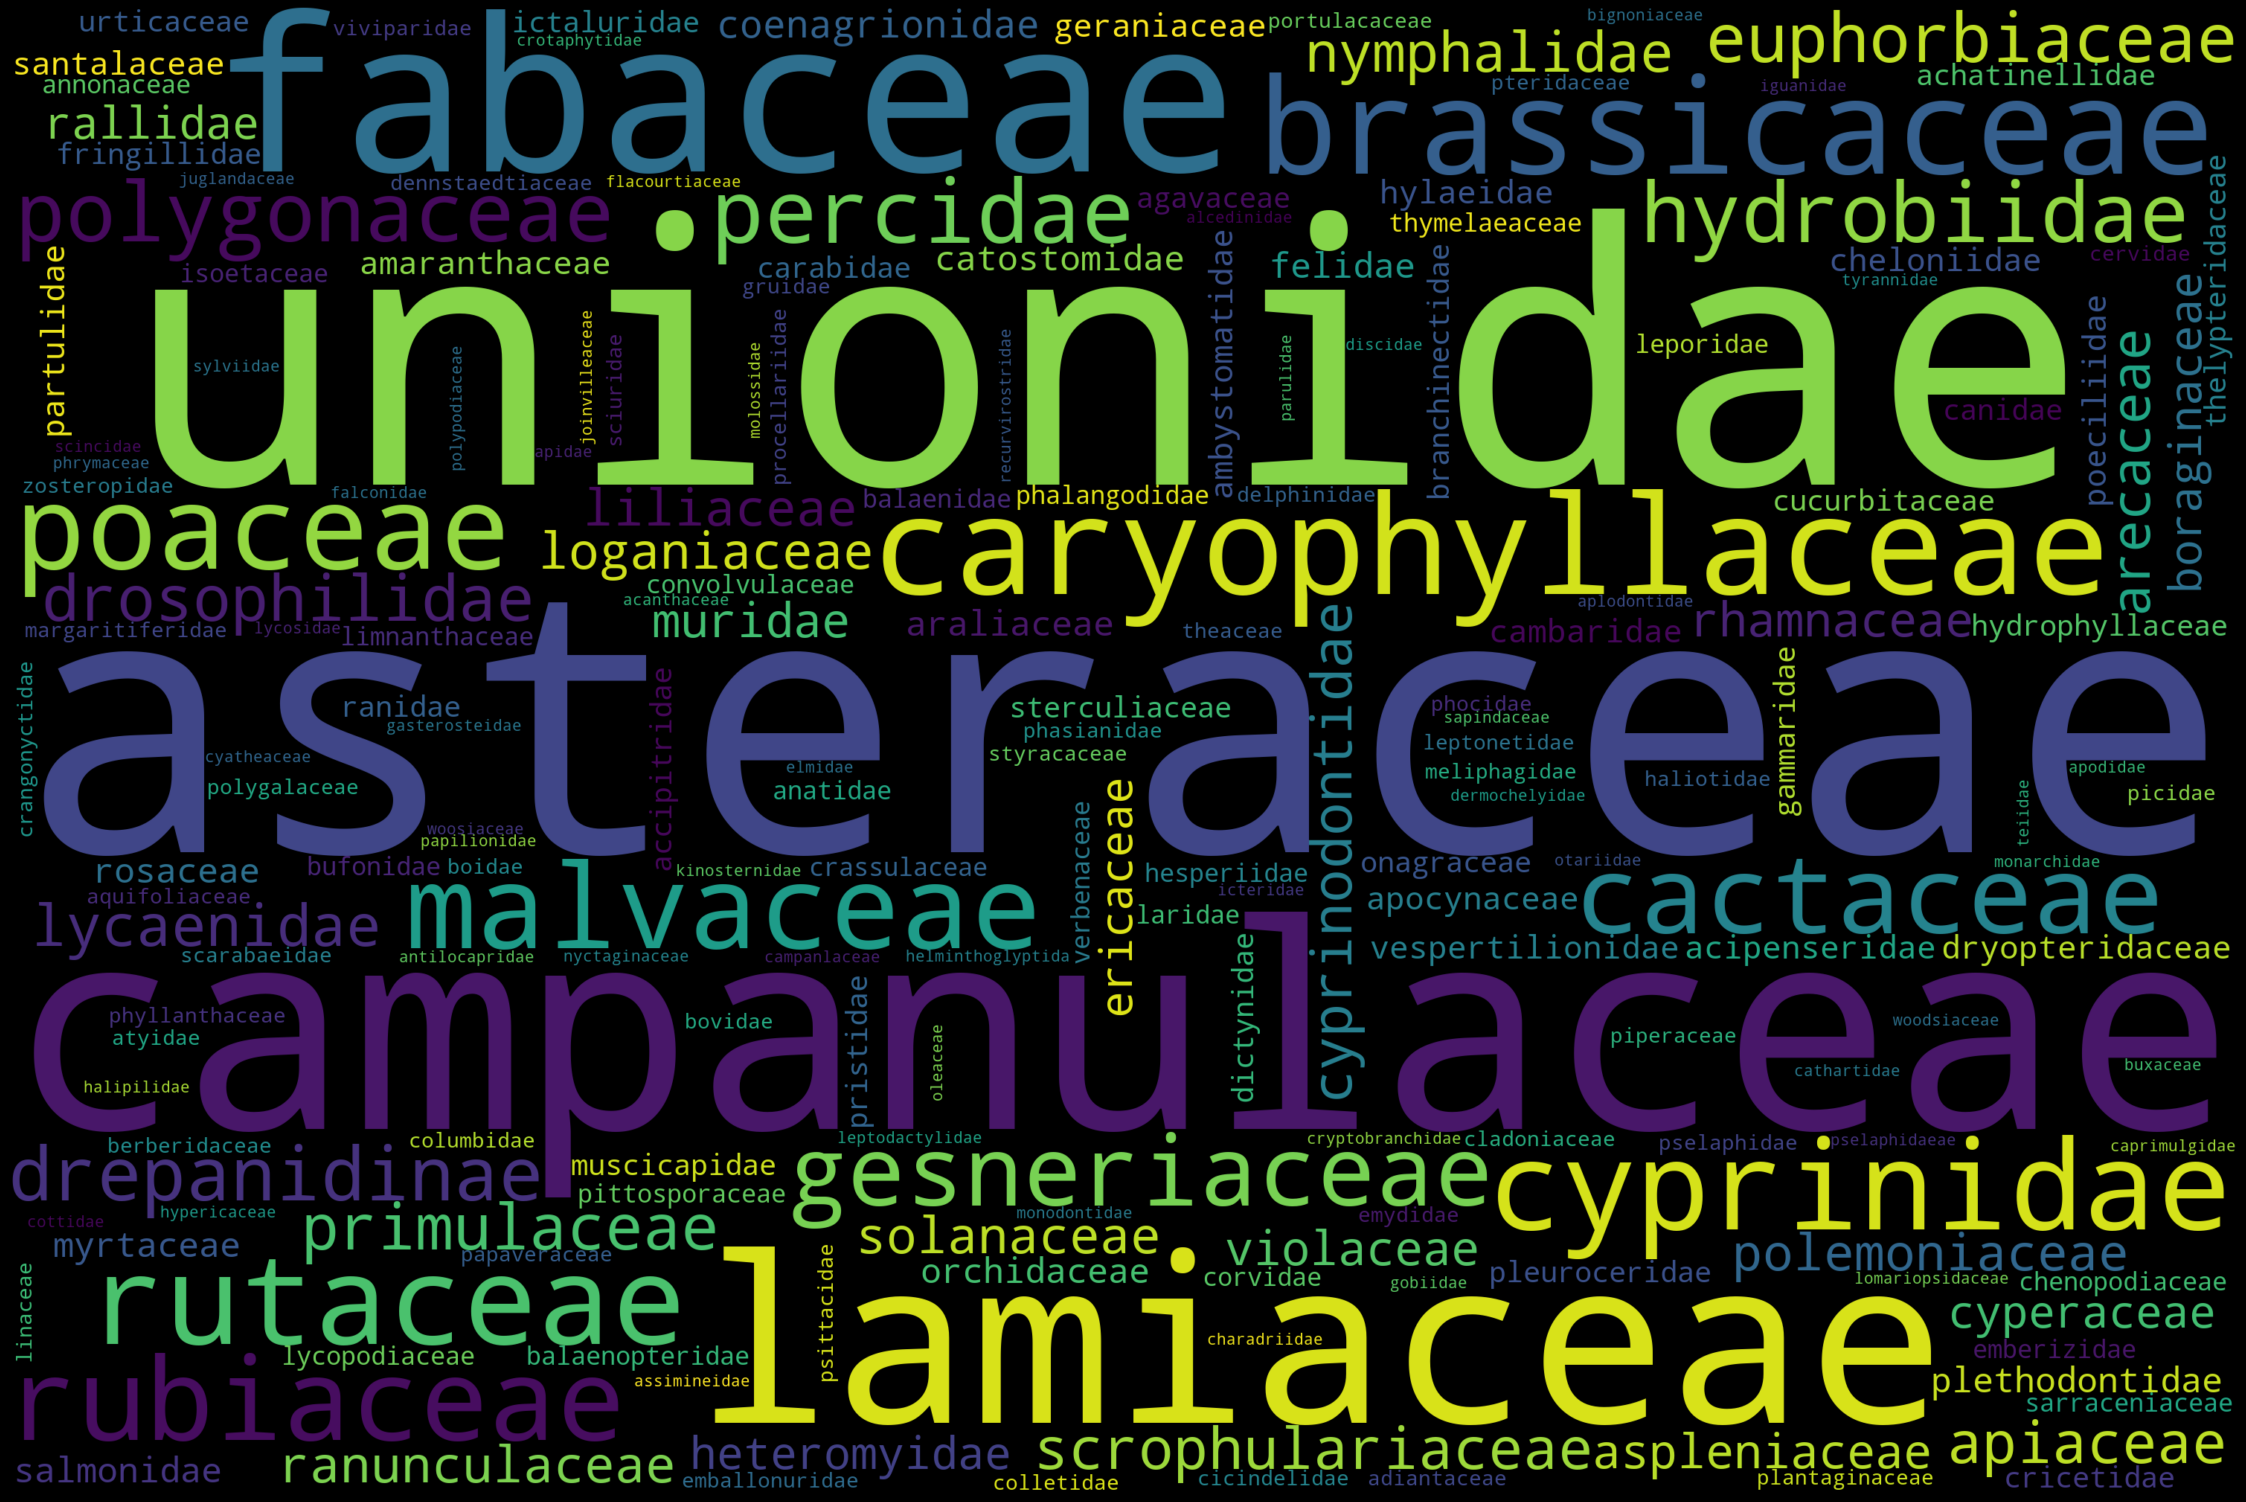

In [11]:
string = " ".join(fname for fname in df_end.Family)

# Create and generate a word cloud image
wordcloud = WordCloud(collocations=False, width=3000, height=2000)
wordcloud.generate(string)

# Display the generated image
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
    

Plant famliy with most endangered species is Asteraceae. Asteraceae not only has the highest number of species in the United States but also is the plant family that requires conservation priority. 

Although Unionidae does not have as many species as Asteraceae, this invertebrate family has a comparable number of endangered species to Asteraceae. We can also see that Cyprinidae and Hydrobiidae are the second and the third animal families with most number of endangered species, respectively. The reason would be that animals such as fishes, mussels and snails are often used to feed other types of animals, and many of them possess useful ingredients for human health. Therefore, they are often the targets of fishers. 





The analysis from this section suggests that we need to have appropriate policies to regulate people in fishing animals to prevent some underwater animal families from extinction.

## 5. Wildlife Research of U.S Fish & Wildlife Service

In this final section, I will do little analysis about the research of U.S Fish and Wildlife Serivice which is the organization I scraped my data from.

In [12]:
df_listed = df[df.Status != "Not Listed"]
status = df.groupby("Status").size()
status.sort_values(ascending = True, inplace = True)
count_status = pd.DataFrame({"Status":status.index, "Count":status.values})


In [13]:
size = status*100/status.values.sum()
labels = count_status["Status"].tolist()

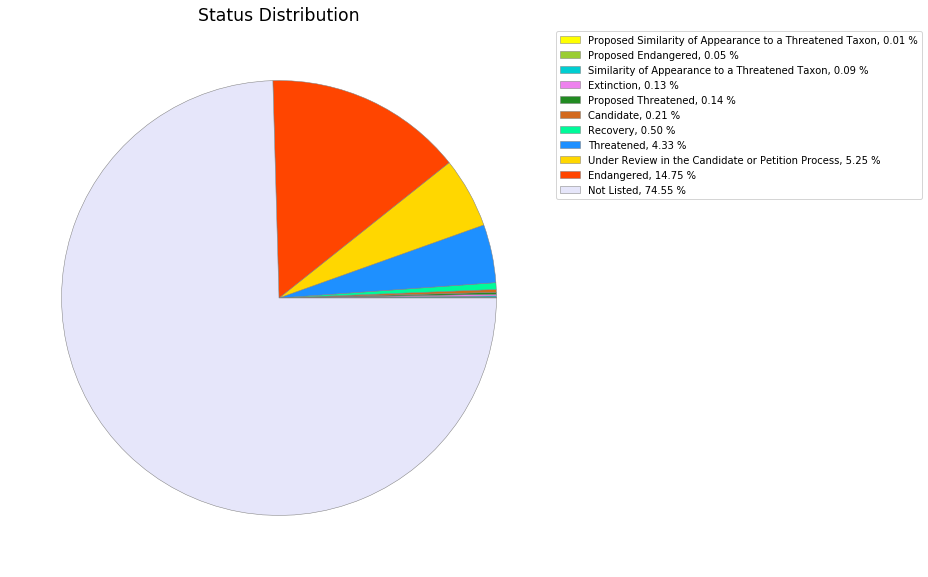

In [14]:
colors = ['yellow','yellowgreen','darkturquoise','violet','forestgreen',
          'chocolate','mediumspringgreen','dodgerblue','gold','orangered','lavender']
          
status.plot.pie(shadow = False, labels = None, radius = 1, colors=colors,
                wedgeprops={"edgecolor":"gray",'linewidth': 0.5, 'antialiased': True}, figsize = (10,10))

plt.title('Status Distribution', fontsize = 'xx-large')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor = (1,1), loc = 'best', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, size)])
plt.show()


According to U.S Wildlife and Fish Service, nearly 15% of the species in the United States are endangered. It is a high proportion and we need to have conservation plans to prevent further issues to the ecosystem.

### Number of Species Listed per Year

In [15]:
date = df.groupby("First Listed").size()
year =[]
for i in range(1970,2025,5):
    year.append(i)
year = df["First Listed"].drop_duplicates().dropna()
year = year.tolist()



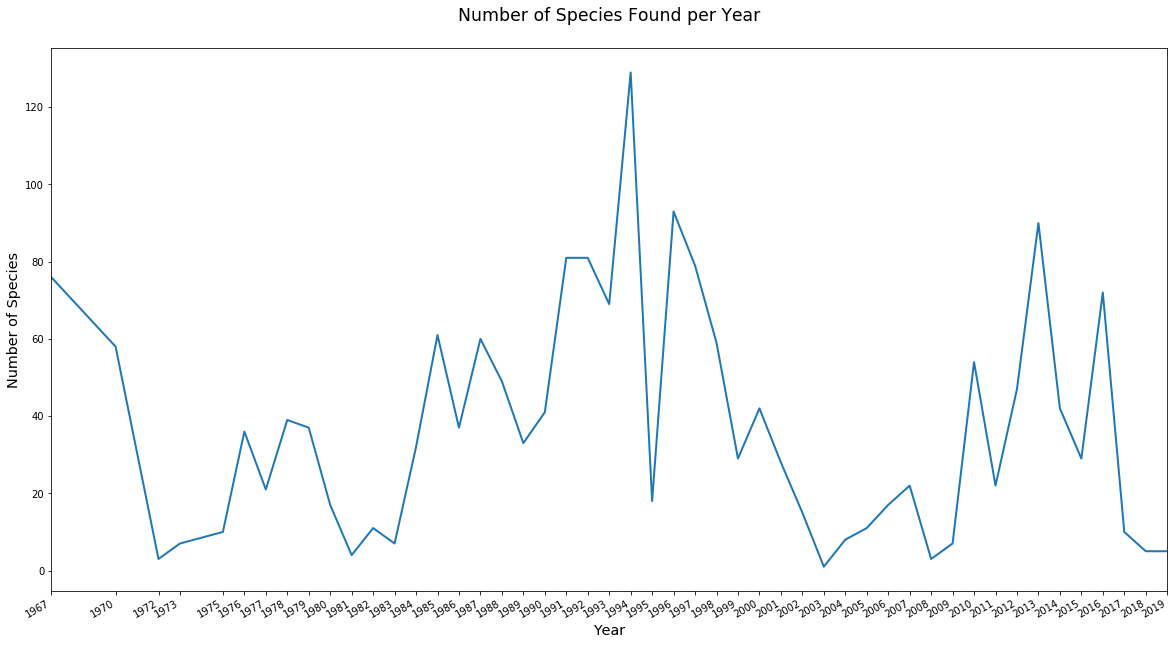

In [16]:
plt.figure(figsize=(20,10))
date.plot(linewidth = 2)
plt.xticks(year, rotation = 30, ha = 'right')
plt.title('Number of Species Found per Year\n', fontsize ='xx-large')
plt.xlabel('Year', fontsize ='x-large')
plt.ylabel('Number of Species', fontsize ='x-large')
plt.show()

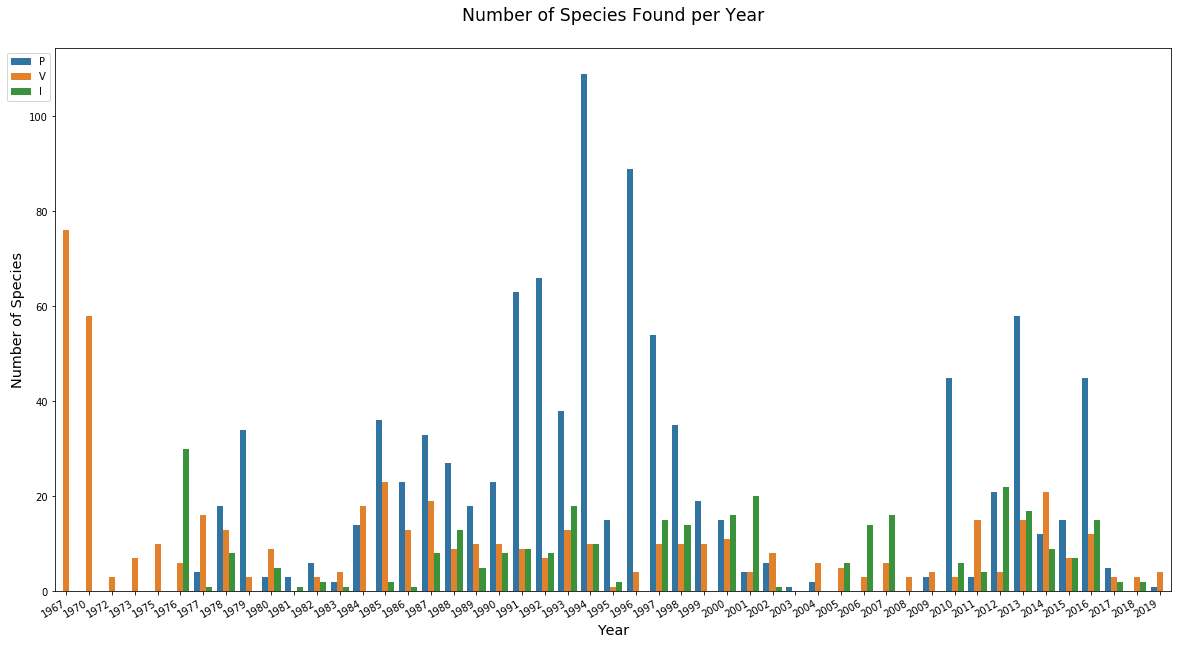

In [17]:
df_date = df[df["First Listed"].notnull()] #save the species that have listing dates into a dataframe
df_date["First Listed"] = df_date["First Listed"].astype(int) #make sure year column is shown as int

#plot
plt.figure(figsize=(20,10))
sns.countplot(x='First Listed',  hue='Type', data=df_date)
plt.xticks(rotation = 30, ha = 'right')
plt.title('Number of Species Found per Year\n', fontsize ='xx-large')
plt.xlabel('Year', fontsize ='x-large')
plt.ylabel('Number of Species', fontsize ='x-large')
plt.legend(bbox_to_anchor = (0,1))


During 1970s, there were many vertebrate species found in the United States. From the end of 1970s to 2000, more flowering plants species were found and successfully grown in the USA. In recent years, there have been fewer species discovered and most of them are animals.

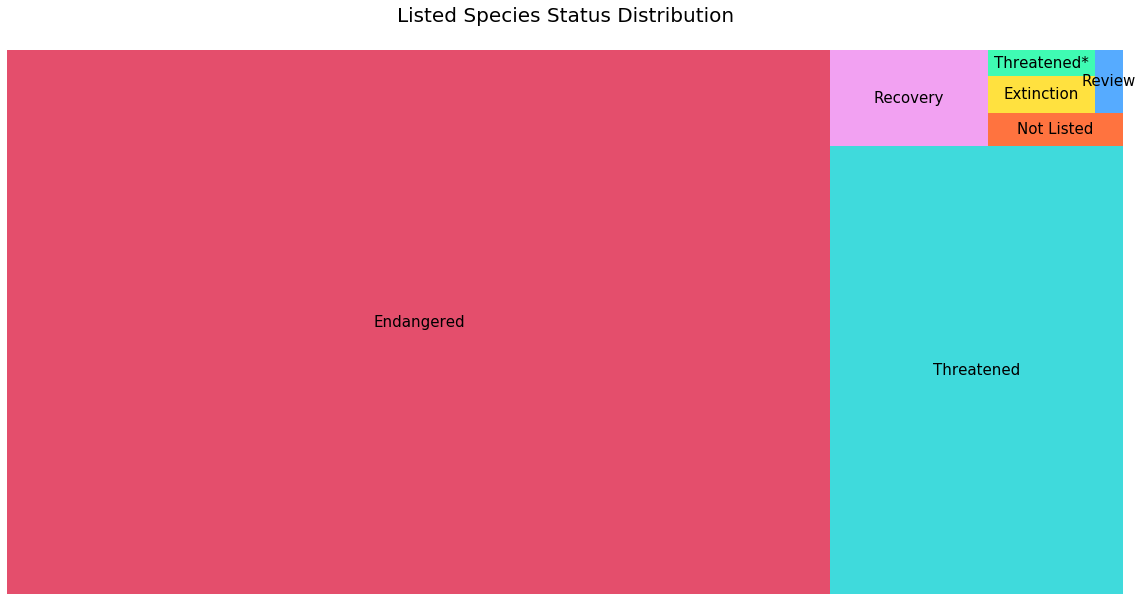

In [18]:
colors = ['crimson','darkturquoise','violet','orangered',
          'gold','mediumspringgreen','dodgerblue']
date_st = df_date["Status"].value_counts() #count the number of listed species by status
date_st = pd.DataFrame({"Status":date_st.index, "Count":date_st.values}) #convert the series into a dataframe

labels = ["Endangered", "Threatened", "Recovery", "Not Listed","Extinction","Threatened*","Review"]

# create plot using squarify
plt.figure(figsize = (20,10))
squarify.plot(sizes=date_st["Count"], label= labels, alpha=.75, color = colors, text_kwargs={'fontsize':15})
plt.axis('off')
plt.title("Listed Species Status Distribution\n ",fontsize=20)
plt.show()

As seen from the graph, the majority of listed species are endangered and threatened, which is in our expectation. These listed species require long time research to be indentified, hence, they were added to the U.S Wildlife list later than others. Some species without listing dates may be foreign species that United States import from other countries and regions.

# III. Conclusion

In summary, Hawaii and California are two states with most numbers of endangered species. Thus, there should be conservation priorities in these regions to maintain their biodiversity as well as prevent plants and animals living there from extinction. Another remarkable finding is the alarming condition of underwater families such as Unionidae (mussels), Hydrobiidae (snails) and Cyprinidae (freshwater fishes). Since they are favorite target of fishers, their population is dwindling and some species in these families are at risk of extinction. We need appropriate regulation about fishing to protect them.